In [1]:
#
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)

In [2]:
#
mon = pd.read_csv('../data/monday.csv', sep = ";", index_col = 'timestamp')
tue = pd.read_csv('../data/tuesday.csv', sep = ";", index_col = 'timestamp')
wed = pd.read_csv('../data/wednesday.csv', sep = ";", index_col = 'timestamp')
thu = pd.read_csv('../data/thursday.csv', sep = ";", index_col = 'timestamp')
fri = pd.read_csv('../data/friday.csv', sep = ";", index_col = 'timestamp')


In [4]:
#
mon.head(), tue.head(), wed.head(), thu.head(), fri.head()

(                     customer_no location
 timestamp                                
 2019-09-02 07:03:00            1    dairy
 2019-09-02 07:03:00            2    dairy
 2019-09-02 07:04:00            3    dairy
 2019-09-02 07:04:00            4    dairy
 2019-09-02 07:04:00            5   spices,
                      customer_no location
 timestamp                                
 2019-09-03 07:02:00            1    fruit
 2019-09-03 07:02:00            2   drinks
 2019-09-03 07:03:00            3    dairy
 2019-09-03 07:05:00            1   drinks
 2019-09-03 07:06:00            4    dairy,
                      customer_no location
 timestamp                                
 2019-09-04 07:00:00            1    fruit
 2019-09-04 07:00:00            2    dairy
 2019-09-04 07:00:00            3    fruit
 2019-09-04 07:00:00            4    fruit
 2019-09-04 07:00:00            5    dairy,
                      customer_no  location
 timestamp                                 
 2019-

In [5]:
#
mon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4884 entries, 2019-09-02 07:03:00 to 2019-09-02 21:50:00
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_no  4884 non-null   int64 
 1   location     4884 non-null   object
dtypes: int64(1), object(1)
memory usage: 114.5+ KB


In [6]:
# change index object type to datetime type
mon.index = pd.to_datetime(mon.index)

## Exploratory Data Analysis

- Calculate the total number of customers in each section
- Calculate the total number of customers in each section over time
- Display the number of customers at checkout over time
- Calculate the time each customer spent in the market
- Calculate the total number of customers in the supermarket over time
- Our business managers think that the first section customers visit follows a different pattern than the following ones.
Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”)


#### 1) Calculate the total number of customers in each section!

In [11]:
mon.groupby('location').count(), mon.groupby('location').nunique()

(          customer_no
 location             
 checkout         1437
 dairy             895
 drinks            797
 fruit            1005
 spices            750,
           customer_no
 location             
 checkout         1437
 dairy             720
 drinks            661
 fruit             827
 spices            584)

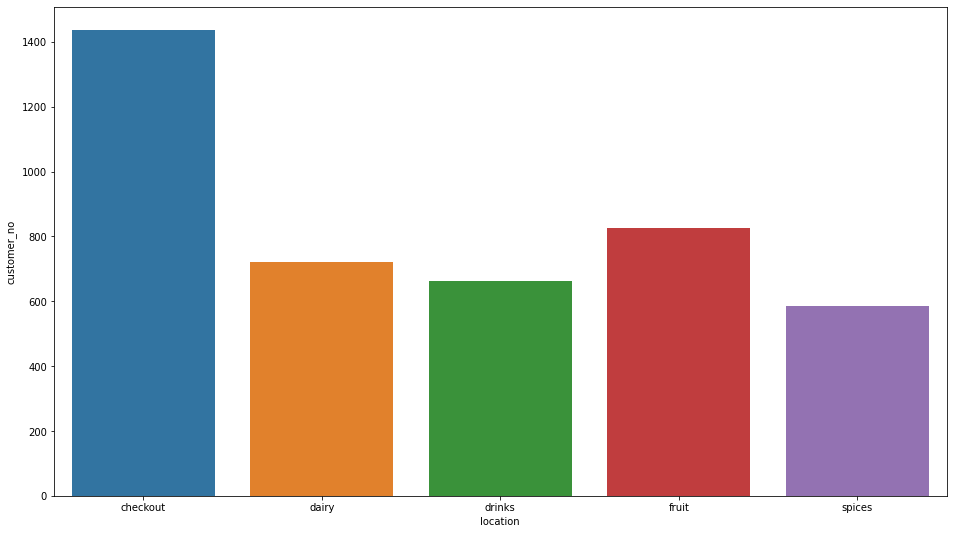

In [7]:
customer_per_section = mon.groupby('location').nunique()
sns.barplot(x = customer_per_section.index, y = customer_per_section['customer_no'])
plt.show()

#### 2) Calculate the total number of customers in each section over time!

In [12]:
mon.groupby(['timestamp', 'location']).nunique()
# the location column depicts the number of different location for a certain timestamp

customer_no
timestamp           location             
2019-09-02 07:03:00 dairy               2
2019-09-02 07:04:00 dairy               2
                    fruit               1
                    spices              3
2019-09-02 07:05:00 checkout            2
...                                   ...
2019-09-02 21:49:00 dairy               1
                    fruit               2
                    spices              2
2019-09-02 21:50:00 dairy               1
                    fruit               1

[2797 rows x 1 columns]

In [9]:
#
dairy = mon[mon['location'] == 'dairy']
fruit = mon[mon['location'] == 'fruit']
drinks = mon[mon['location'] == 'drinks']
spices = mon[mon['location'] == 'spices']

In [10]:
#
dairy_custom_by_time = dairy.groupby('timestamp').count()
fruit_custom_by_time = fruit.groupby('timestamp').count()
drinks_custom_by_time = drinks.groupby('timestamp').count()
spices_custom_by_time = spices.groupby('timestamp').count()

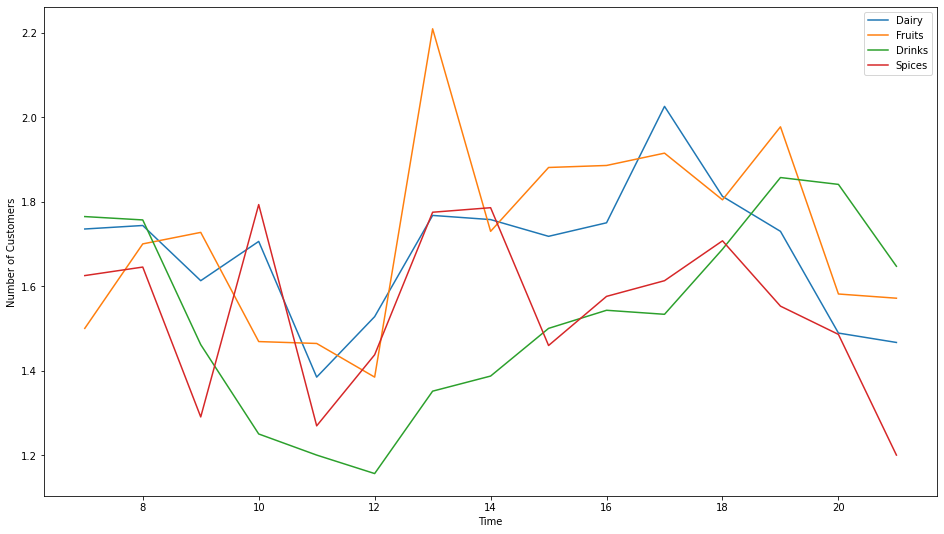

In [11]:
#
sns.lineplot(dairy_custom_by_time.index.hour, dairy_custom_by_time['customer_no'], label = 'Dairy', ci = None)
sns.lineplot(fruit_custom_by_time.index.hour, fruit_custom_by_time['customer_no'], label = 'Fruits', ci = None)
sns.lineplot(drinks_custom_by_time.index.hour, drinks_custom_by_time['customer_no'], label = 'Drinks', ci = None)
sns.lineplot(spices_custom_by_time.index.hour, spices_custom_by_time['customer_no'], label = 'Spices', ci = None)
plt.xlabel('Time')
plt.ylabel('Number of Customers')
plt.show()

####  3) Display the number of customers at checkout over time!

In [12]:
#
checkout = mon[mon['location'] == 'checkout']
checkout_custom_by_time = mon.groupby('timestamp').count()

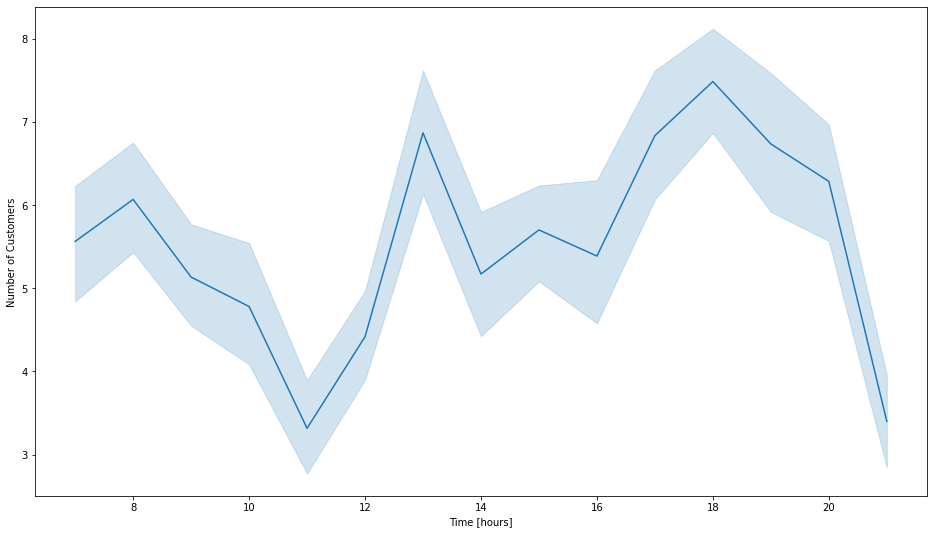

In [13]:
#
sns.lineplot(x = checkout_custom_by_time.index.hour, y = checkout_custom_by_time['customer_no'])
plt.xlabel('Time [hours]')
plt.ylabel('Number of Customers')
plt.show()

#### 4) Calculate the time each customer spent in the market!

In [19]:
mon.index

DatetimeIndex(['2019-09-02 07:03:00', '2019-09-02 07:03:00',
               '2019-09-02 07:04:00', '2019-09-02 07:04:00',
               '2019-09-02 07:04:00', '2019-09-02 07:04:00',
               '2019-09-02 07:04:00', '2019-09-02 07:04:00',
               '2019-09-02 07:05:00', '2019-09-02 07:05:00',
               ...
               '2019-09-02 21:48:00', '2019-09-02 21:49:00',
               '2019-09-02 21:49:00', '2019-09-02 21:49:00',
               '2019-09-02 21:49:00', '2019-09-02 21:49:00',
               '2019-09-02 21:49:00', '2019-09-02 21:49:00',
               '2019-09-02 21:50:00', '2019-09-02 21:50:00'],
              dtype='datetime64[ns]', name='timestamp', length=4884, freq=None)

In [20]:
#
mon['Timestamp'] = mon.index
df = pd.DataFrame(mon.groupby('customer_no').min()['Timestamp'])
df['Checkout_Time'] = mon.groupby('customer_no').max()['Timestamp']
df['Spent_Time'] = df['Checkout_Time'] - df['Timestamp']
df.rename(columns = {'Timestamp': 'Start_Time'}, inplace = True)
df

,Start_Time,Checkout_Time,Spent_Time
customer_no,,,
1,2019-09-02 07:03:00,2019-09-02 07:05:00,0 days 00:02:00
2,2019-09-02 07:03:00,2019-09-02 07:06:00,0 days 00:03:00
3,2019-09-02 07:04:00,2019-09-02 07:06:00,0 days 00:02:00
4,2019-09-02 07:04:00,2019-09-02 07:08:00,0 days 00:04:00
5,2019-09-02 07:04:00,2019-09-02 07:05:00,0 days 00:01:00
...,...,...,...
1443,2019-09-02 21:47:00,2019-09-02 21:48:00,0 days 00:01:00
1444,2019-09-02 21:48:00,2019-09-02 21:49:00,0 days 00:01:00
1445,2019-09-02 21:49:00,2019-09-02 21:49:00,0 days 00:00:00


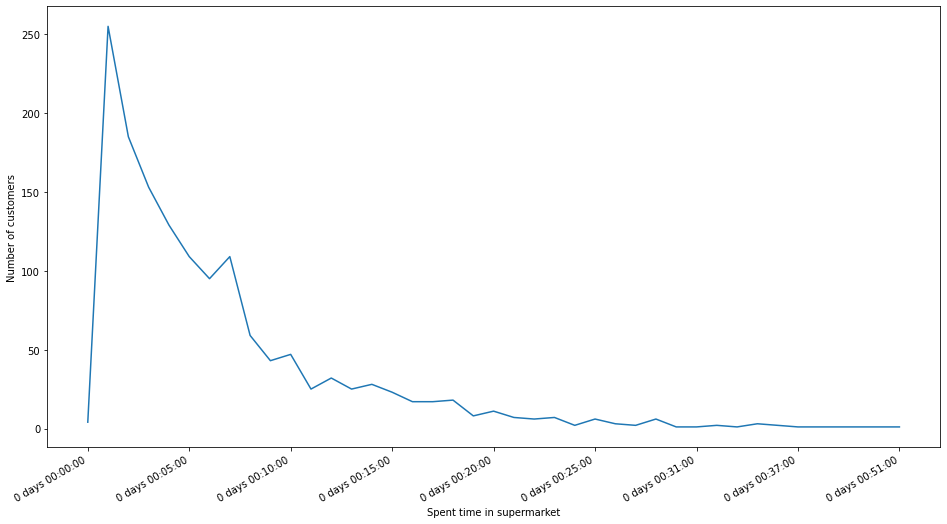

In [21]:
# 
groupby_spent_time = df.groupby('Spent_Time').count()
groupby_spent_time['Checkout_Time'].plot()
plt.xlabel('Spent time in supermarket')
plt.ylabel('Number of customers')
plt.show()

#### 5) Calculate the total number of customers in the supermarket over time!

In [27]:
#
custom_over_time = pd.DataFrame(mon.groupby('Timestamp').count()['customer_no'])
custom_over_time

,customer_no
Timestamp,
2019-09-02 07:03:00,2
2019-09-02 07:04:00,6
2019-09-02 07:05:00,4
2019-09-02 07:06:00,8
2019-09-02 07:07:00,4
...,...
2019-09-02 21:46:00,6
2019-09-02 21:47:00,6
2019-09-02 21:48:00,7


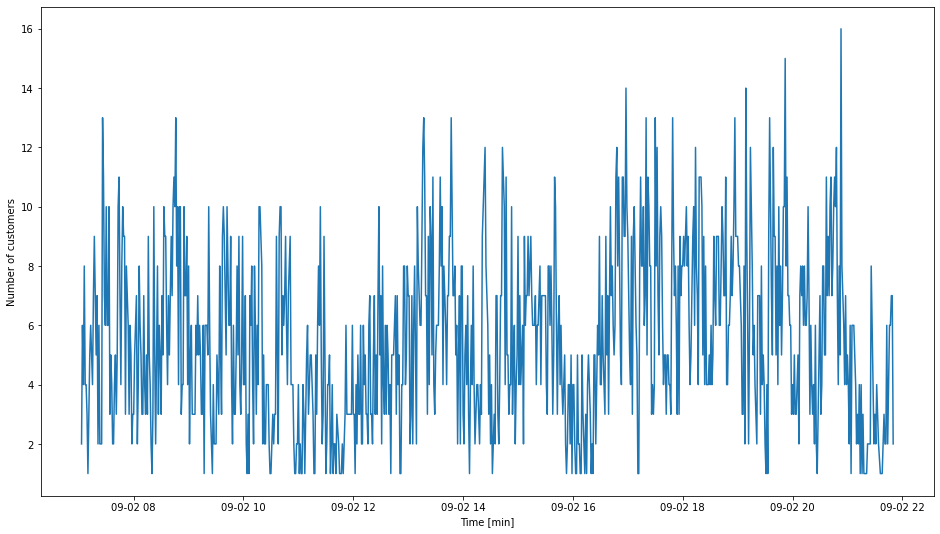

In [46]:
# number of customers per minute
sns.lineplot(x = custom_over_time.index, y = 'customer_no', data = custom_over_time)
plt.xlabel('Time [min]')
plt.ylabel('Number of customers')
plt.show()

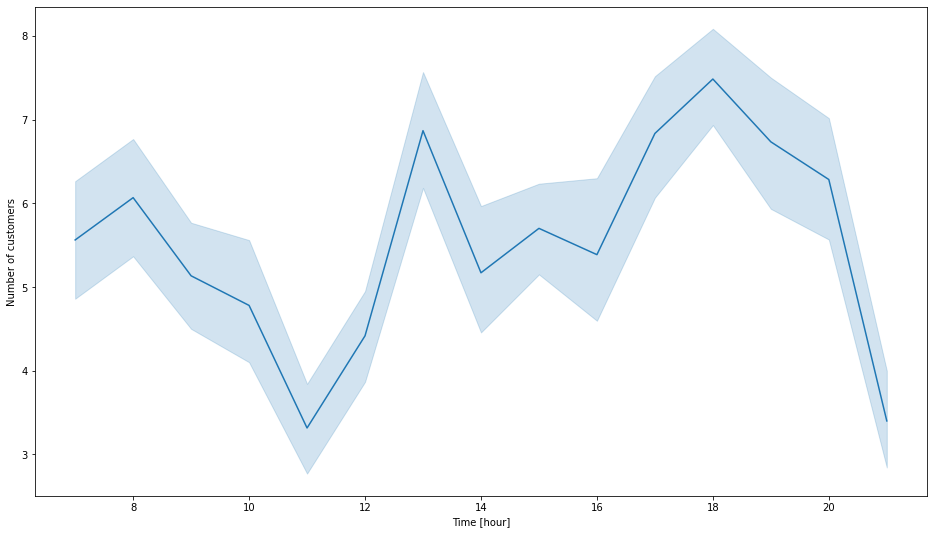

In [44]:
# number of customers for each hour
sns.lineplot(x = custom_over_time.index.hour, y = 'customer_no', data = custom_over_time)
plt.xlabel('Time [hour]')
plt.ylabel('Number of customers')
plt.show()

#### 6) Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”)

In [65]:
#
mon['First_Timestamp'] = mon.duplicated('customer_no')
mon

,customer_no,location,Timestamp,First_Timestamp
timestamp,,,,
2019-09-02 07:03:00,1,dairy,2019-09-02 07:03:00,False
2019-09-02 07:03:00,2,dairy,2019-09-02 07:03:00,False
2019-09-02 07:04:00,3,dairy,2019-09-02 07:04:00,False
2019-09-02 07:04:00,4,dairy,2019-09-02 07:04:00,False
2019-09-02 07:04:00,5,spices,2019-09-02 07:04:00,False
...,...,...,...,...
2019-09-02 21:49:00,1442,checkout,2019-09-02 21:49:00,True
2019-09-02 21:49:00,1444,checkout,2019-09-02 21:49:00,True
2019-09-02 21:49:00,1445,dairy,2019-09-02 21:49:00,False


In [69]:
#
first_visited_sec = mon.loc[~mon['First_Timestamp'], 'location'].value_counts()
first_visited_sec

fruit     520
dairy     412
spices    283
drinks    232
Name: location, dtype: int64

In [72]:
#
follow_visitid_sec = mon.loc[mon['First_Timestamp'] & ~ (mon['location'] == 'checkout'), 'location'].value_counts()
follow_visitid_sec

drinks    565
fruit     485
dairy     483
spices    467
Name: location, dtype: int64

In [73]:
#
visited_sec_total = pd.DataFrame({'First_Visited_Sections': first_visited_sec,
                                'Following_Visited_Sections': follow_visitid_sec})
visited_sec_total

,First_Visited_Sections,Following_Visited_Sections
dairy,412,483
drinks,232,565
fruit,520,485
spices,283,467


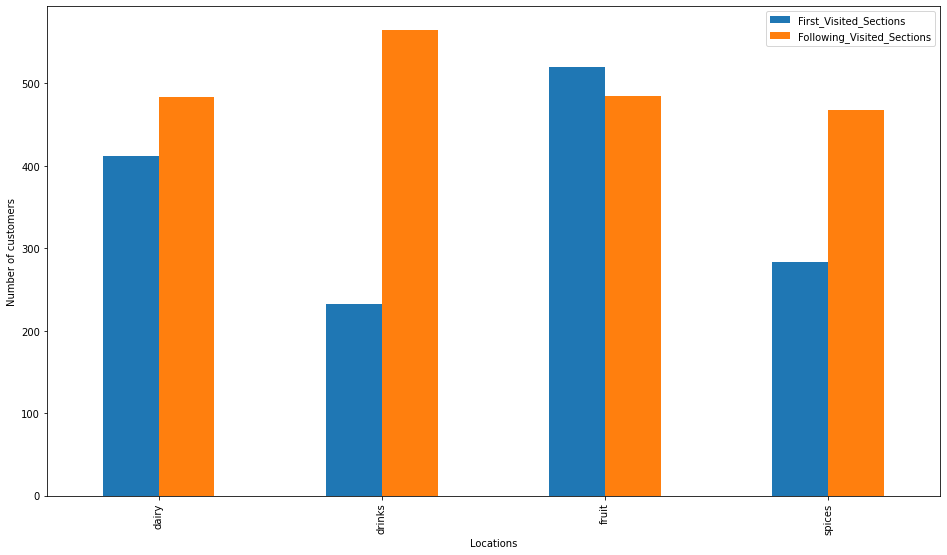

In [75]:
#
visited_sec_total.plot(kind='bar')
plt.xlabel('Locations')
plt.ylabel('Number of customers')
plt.show()